<a href="https://colab.research.google.com/github/OctavioSantalucia/econometria/blob/main/ejercicios/C1%20Cap15%20Variables%20Instrumentales%20-%20Soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consigna

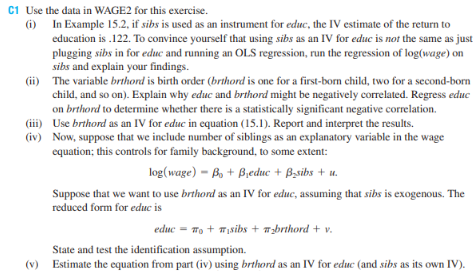

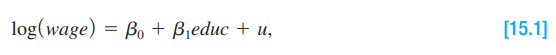

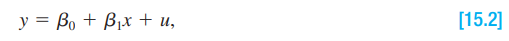

# Solución

Descripción del dataset:
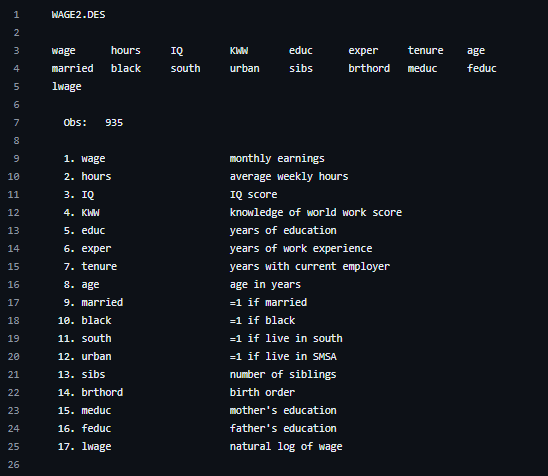

https://github.com/rpasquini/econometria/blob/main/datos/datasets_wooldridge/WAGE2_description.txt



In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_excel('https://github.com/rpasquini/econometria/blob/main/datos/datasets_wooldridge/wage2.xls?raw=true', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2,8,8,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,.,14,14,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2,14,14,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3,12,12,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6,6,11,6.331502


In [ ]:
columns= ["wage", "hours", "IQ", "KWW", "educ", "exper", "tenure", "age", "married", "black", "south", "urban", "sibs", "brthord", "meduc", "feduc", "lwage"]
df.columns=columns
df.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2,8,8,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,.,14,14,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2,14,14,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3,12,12,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6,6,11,6.331502


 (i) In Example 15.2, if sibs is used as an instrument for educ, the IV estimate of the return to
education is .122. To convince yourself that using sibs as an IV for educ is not the same as just
plugging sibs in for educ and running an OLS regression, run the regression of log(wage) on
sibs and explain your findings.

In [ ]:
def regress(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [ ]:
regress(['lwage','sibs'],df)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     22.31
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           2.68e-06
Time:                        14:32:24   Log-Likelihood:                -506.59
No. Observations:                 935   AIC:                             1017.
Df Residuals:                     933   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8611      0.022    310.771      0.0

(ii) The variable brthord is birth order (brthord is one for a first-born child, two for a second-born
child, and so on). Explain why educ and brthord might be negatively correlated. Regress educ
on brthord to determine whether there is a statistically significant negative correlation.

In [ ]:
regress(['educ','brthord'],df)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
#me sale error porque brthord tiene valores que no son números. voy a limpiar brthord.
df['brthord'] = pd.to_numeric(df['brthord'], errors='coerce')
df = df.dropna(subset=['brthord'])
df['brthord'] = df['brthord'].astype(int)
regress(['educ','brthord'],df)

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     37.29
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           1.55e-09
Time:                        15:47:49   Log-Likelihood:                -1861.9
No. Observations:                 852   AIC:                             3728.
Df Residuals:                     850   BIC:                             3737.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1494      0.129    109.962      0.0

<ipython-input-7-628c7f0b63bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brthord'] = df['brthord'].astype(int)


(iii) Use brthord as an IV for educ in equation (15.1). Report and interpret the results.

Para encontrar el efecto de X sobre Y en variables instrumentales necesitamos dos otros efectos: La forma reducida (reduced form) y la primera etapa (first stage).

Para encontrarlos, podemos correr dos regresiones, y extraer del resultado los ${\beta_1}$


La estimacion de la **forma reducida**

$y=\beta_0+\beta_1 Z+\varepsilon$

*Alternativamente podría decirse que*
$\hat{\beta_1}=\frac{Cov(z,y)}{var(z)}$

La estimacion de la **primera etapa**

$x=\gamma_0+\gamma_1 Z+\varepsilon$

*Alternativamente podrái decirse que*

$\hat{\gamma_1}=\frac{Cov(z,x)}{var(z)}$

$\beta_{VI}=\frac{\hat{\beta_1}}{\hat{\gamma_1}}=\frac{\frac{Cov(z,y)}{var(z)}}{\frac{Cov(z,x)}{var(z)}}=\frac{Cov(z,y)}{Cov(z,x)}$

Por el álgebra de arriba sabemos que, en regresión simple, podemos prescindir de correr las regresiones y utilizar las covarianzas. Sin embargo, es recomendable utilizar OLS ya que sirve también para regresión múltiple.

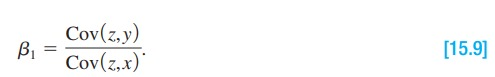

In [ ]:
#cálculo de reduced form
cov_matrix = df[['brthord','lwage']].cov()
cov_zy = cov_matrix.loc['brthord','lwage']
print(cov_zy)

-0.09401282967290621


In [ ]:
#cálculo de first stage
cov_matrix = df[['brthord','educ']].cov()
cov_zx = cov_matrix.loc['brthord','educ']
print(cov_zx)

-0.7196063178916823


In [ ]:
b1 = cov_zy/cov_zx
print("el b1 estimado por iv es",b1)


el b1 estimado por iv es 0.1306448086063877


Si quisiésemos calcular también el B0 del modelo instrumentado podríamos obtenerlo así:

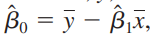

In [ ]:
lwage_mean = df['lwage'].mean()
educ_mean =df['educ'].mean()
print(lwage_mean)
print(educ_mean)

6.794868839201879
13.505868544600938


In [ ]:
b0 = lwage_mean - b1 * educ_mean
print("el b0 estimado por iv es",b0)

el b0 estimado por iv es 5.030397228129457


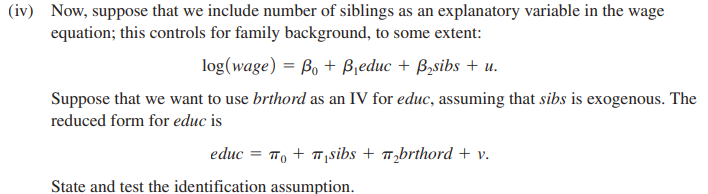

(v) Estimate the equation from part (iv) using brthord as an IV for educ (and sibs as its own IV).
Comment on the standard errors for b^
educ and b^
sibs.

In [71]:
# iv y v) se resuelven juntas
regress(['lwage','sibs','brthord'],df)
print(' ')
regress(['educ','sibs','brthord'],df)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     11.81
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           8.75e-06
Time:                        17:50:22   Log-Likelihood:                -448.17
No. Observations:                 852   AIC:                             902.3
Df Residuals:                     849   BIC:                             916.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8971      0.026    269.642      0.0

In [73]:
reduced_form = -0.0209
first_stage = -0.1527
b1_controlado = reduced_form/first_stage
print(b1_controlado)

0.13686967910936476
